
# Predicting Titanic Survival Using Logistic Regression

## Introduction

Logistic Regression is a classification algorithm used to predict **binary outcomes (0 or 1)**. Unlike Linear Regression, which predicts continuous values, Logistic Regression calculates the probability of an event occurring using the **sigmoid function**.

### **Real-world Applications of Logistic Regression:**
1. **Medical Diagnosis** - Predicting if a patient has a disease (Yes/No).
2. **Fraud Detection** - Identifying fraudulent transactions.
3. **Customer Churn Prediction** - Determining if a customer will leave a service.
4. **Email Classification** - Filtering spam emails.

In this notebook, we apply **Logistic Regression** on the **Titanic Dataset** to predict survival outcomes based on passenger features like age, fare, and class.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Load Titanic Dataset from Seaborn
df = sns.load_dataset("titanic")
df.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [2]:

# Select relevant features
df = df[['survived', 'pclass', 'sex', 'age', 'fare', 'embark_town']].dropna()

# Convert categorical variables
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embark_town'] = df['embark_town'].map({'Southampton': 0, 'Cherbourg': 1, 'Queenstown': 2})

# Define features and target
X = df[['pclass', 'sex', 'age', 'fare', 'embark_town']]
y = df['survived']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)


Accuracy Score: 0.79

Classification Report:

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        80
           1       0.85      0.63      0.73        63

    accuracy                           0.79       143
   macro avg       0.81      0.77      0.78       143
weighted avg       0.80      0.79      0.78       143



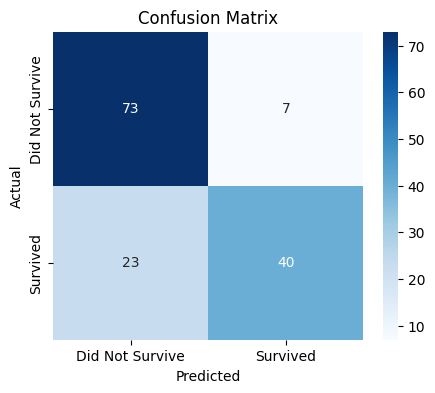

In [4]:

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt='d', 
            xticklabels=["Did Not Survive", "Survived"], yticklabels=["Did Not Survive", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



## Conclusion

- We applied **Logistic Regression** to predict survival on the Titanic based on passenger class, gender, age, fare, and embarkation town.
- The model achieved an accuracy score, indicating its predictive power.
- Logistic Regression is widely used in **fraud detection, medical diagnosis, and customer churn prediction**.

### **Next Steps:**
- Experiment with **Polynomial Features** to improve performance.
- Tune hyperparameters to optimize results.
- Try **Regularization (L1 & L2)** to prevent overfitting.

🚀 *Would you use Logistic Regression in real-world projects? Let’s discuss!*  
